In [1]:
'''Make figures of feature decoding results.'''


import argparse
import os

import bdpy
from bdpy.fig import makeplots
from bdpy.util import makedir_ifnot
import matplotlib.pyplot as plt
import pandas as pd
import yaml


In [2]:
# Settings #######################################################
conf_file = "config/recon_vggsound_fmriprep_rep4_500voxel_vggishish_allunits_fastl2lir_alpha100.yaml"
output_dir = './derivatives/figures'

with open(conf_file, 'r') as f:
    conf = yaml.safe_load(f)
#quality_file = os.path.join(conf['eval feat output dir'], "quality.pkl.gz")
audiofeature_quality_file = os.path.join(conf['eval feat output dir'], "quality_audiofeature.pkl.gz")
eval_feats = ["f0", "sc", "hnr"]

subjects = conf['recon subjects']
rois = conf['recon rois']
layers = list(conf['recon layers'].keys())

#print("Qaultiy filepath:", quality_file)
print("Audio feature qaultiy filepath:", audiofeature_quality_file)
print("Subjects: {}".format(subjects))
print("ROIs:     {}".format(rois))
print("Layers:   {}".format(layers))
print("Eval feats: {}".format(eval_feats))
#quality_df = pd.read_pickle(quality_file)
aud_quality_df = pd.read_pickle(audiofeature_quality_file)
quality_df = aud_quality_df
#quality_df = pd.concat([quality_df, aud_quality_df])
display(quality_df)



Audio feature qaultiy filepath: ./derivatives/recon_features/specvqgan/decoded/sound_originals/melception/quality_audiofeature.pkl.gz
Subjects: ['S1', 'S2', 'S3', 'S4', 'S5']
ROIs:     ['ACT']
Layers:   ['conv5_3']
Eval feats: ['f0', 'sc', 'hnr']


,layer,subject,roi,eval_feat,euclidean distance,identification accuracy
0,conv5_3,S1,ACT,f0,"[81.46525113289118, 236.23646915961268, 169.99...","[0.7285714149475098, 0.7071428298950195, 0.707..."
1,conv5_3,S1,ACT,hnr,"[2.376040454217521, 3.4582206272387817, 2.8194...","[0.6442953, 0.5033557, 0.58389264, 0.90604025,..."
2,conv5_3,S1,ACT,sc,"[756.6157051256323, 654.7698929753749, 985.933...","[0.38255033, 0.38255033, 0.38255033, 0.5637584..."
3,conv5_3,S2,ACT,f0,"[14.738056781587176, 36.051562433665055, 60.79...","[0.7928571701049805, 0.7928571701049805, 0.75,..."
4,conv5_3,S2,ACT,hnr,"[2.0713080663342316, 1.3933323953433687, 3.919...","[0.5637584, 0.82550335, 0.54362416, 0.90604025..."
5,conv5_3,S2,ACT,sc,"[1091.1004663771987, 1030.6703046827824, 916.8...","[0.38255033, 0.38255033, 0.38255033, 0.9463087..."
6,conv5_3,S3,ACT,f0,"[30.81821536069333, 84.67642061593364, 107.156...","[0.8357142806053162, 0.7285714149475098, 0.728..."
7,conv5_3,S3,ACT,hnr,"[2.756819617981131, 4.320799409298039, 3.78168...","[0.58389264, 0.46308726, 0.46308726, 0.9060402..."
8,conv5_3,S3,ACT,sc,"[1109.4142904020405, 570.883557790735, 876.733...","[0.38255033, 0.40268457, 0.38255033, 0.9865771..."
9,conv5_3,S4,ACT,f0,"[320.4761023039486, 142.81787192915948, 130.75...","[0.6642857193946838, 0.7071428298950195, 0.707..."


In [7]:
# Creating figures #######################################################

# Profile correlation
figs = makeplots(
    quality_df,
    x='eval_feat', x_list=eval_feats,
    y='identification accuracy',
    group='subject', group_list=subjects,
    subplot='layer', subplot_list=layers,
    figure='layer', figure_list=layers,
    plot_type='swarm+box',
    horizontal=False,
    x_label='Evaluation Features', y_label='Identification accuracy',
    title='Subject',
    style='seaborn-bright',
    plot_size_auto=True, plot_size=(2, 3), #max_col=2,
    y_lim=[0.0, 1.0], y_ticks=[0, 0.2, 0.4, 0.6, 0.8, 1.0],
    chance_level=0.5, chance_level_style={'color': 'black', 'linewidth': 1}
)
for i, fig in enumerate(figs):
    os.makedirs(output_dir, exist_ok = True)
    save_filename = os.path.join(output_dir, 'recon_identification-accuracy.pdf')
    fig.savefig(save_filename, dpi=300, bbox_inches='tight', pad_inches=0.05)
    print('Saved {}'.format(save_filename))
    save_filename = os.path.join(output_dir, 'recon_identification-accuracy.png')
    fig.savefig(save_filename, dpi=300, bbox_inches='tight', pad_inches=0.05)
    print('Saved {}'.format(save_filename))
    plt.close(fig)


/home/dni/mtanaka/.conda/envs/specvqgan/lib/python3.8/site-packages/bdpy/fig/makeplots.py:85: UserWarning: "grouping mode" is still experimental and will not work correctly yet!
  warnings.warn('"grouping mode" is still experimental and will not work correctly yet!')
/home/dni/mtanaka/.conda/envs/specvqgan/lib/python3.8/site-packages/bdpy/fig/makeplots.py:491: UserWarning: When grouping is True, "box_width" is not working to make the layout consistent with the swarm plot.
  warnings.warn('When grouping is True, "box_width" is not working to make the layout consistent with the swarm plot.')
/home/dni/mtanaka/.conda/envs/specvqgan/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 15.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/dni/mtanaka/.conda/envs/specvqgan/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 10.4% of the points cannot be placed; you ma

Saved ./derivatives/figures/recon_identification-accuracy.pdf
Saved ./derivatives/figures/recon_identification-accuracy.png


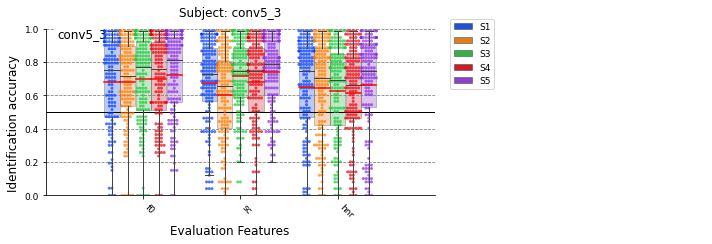

In [8]:
fig

In [ ]:


    figs = makeplots(
        perf_df,
        x='roi', x_list=rois,
        y='profile correlation',
        subplot='layer', subplot_list=features,
        figure='subject', figure_list=subjects,
        plot_type='violin',
        horizontal=True,
        x_label='Layer', y_label='Profile correlation',
        title='Subject',
        style='seaborn-bright',
        plot_size_auto=True, plot_size=(4, 0.3), max_col=2,
        y_lim=[-0.6, 1], y_ticks=[-0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8],
        chance_level=0, chance_level_style={'color': 'gray', 'linewidth': 1}
    )
    for i, fig in enumerate(figs):
        save_filename = os.path.join(output_dir, 'featdec_profile-correlation_rois_subject-{}.pdf'.format(subjects[i]))
        fig.savefig(save_filename, dpi=300, bbox_inches='tight', pad_inches=0.05)
        print('Saved {}'.format(save_filename))
        save_filename = os.path.join(output_dir, 'featdec_profile-correlation_rois_subject-{}.png'.format(subjects[i]))
        fig.savefig(save_filename, dpi=300, bbox_inches='tight', pad_inches=0.05)
        print('Saved {}'.format(save_filename))
        plt.close(fig)

    # Pattern correlation
    figs = makeplots(
        perf_df,
        x='layer', x_list=features,
        y='pattern correlation',
        subplot='roi', subplot_list=rois,
        figure='subject', figure_list=subjects,
        plot_type='swarm+box',
        horizontal=True,
        x_label='Layer', y_label='Pattern correlation',
        title='Subject',
        style='seaborn-bright',
        plot_size_auto=True, plot_size=(4, 0.3), max_col=2,
        y_lim=[-0.6, 1], y_ticks=[-0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8],
        chance_level=0, chance_level_style={'color': 'gray', 'linewidth': 1}
    )
    for i, fig in enumerate(figs):
        save_filename = os.path.join(output_dir, 'featdec_pattern-correlation_layers_subject-{}.pdf'.format(subjects[i]))
        fig.savefig(save_filename, dpi=300, bbox_inches='tight', pad_inches=0.05)
        print('Saved {}'.format(save_filename))
        save_filename = os.path.join(output_dir, 'featdec_pattern-correlation_layers_subject-{}.png'.format(subjects[i]))
        fig.savefig(save_filename, dpi=300, bbox_inches='tight', pad_inches=0.05)
        print('Saved {}'.format(save_filename))
        plt.close(fig)

    figs = makeplots(
        perf_df,
        x='roi', x_list=rois,
        y='pattern correlation',
        subplot='layer', subplot_list=features,
        figure='subject', figure_list=subjects,
        plot_type='swarm+box',
        horizontal=True,
        x_label='Layer', y_label='Pattern correlation',
        title='Subject',
        style='seaborn-bright',
        plot_size_auto=True, plot_size=(4, 0.3), max_col=2,
        y_lim=[-0.6, 1], y_ticks=[-0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8],
        chance_level=0, chance_level_style={'color': 'gray', 'linewidth': 1}
    )
    for i, fig in enumerate(figs):
        save_filename = os.path.join(output_dir, 'featdec_pattern-correlation_rois_subject-{}.pdf'.format(subjects[i]))
        fig.savefig(save_filename, dpi=300, bbox_inches='tight', pad_inches=0.05)
        print('Saved {}'.format(save_filename))
        save_filename = os.path.join(output_dir, 'featdec_pattern-correlation_rois_subject-{}.png'.format(subjects[i]))
        fig.savefig(save_filename, dpi=300, bbox_inches='tight', pad_inches=0.05)
        print('Saved {}'.format(save_filename))
        plt.close(fig)

    # Identification
    figs = makeplots(
        perf_df,
        x='layer', x_list=features,
        y='identification accuracy',
        subplot='roi', subplot_list=rois,
        figure='subject', figure_list=subjects,
        plot_type='swarm+box',
        horizontal=True,
        x_label='Layer', y_label='Pairwise identification accuracy',
        title='Subject',
        style='seaborn-bright',
        plot_size_auto=True, plot_size=(4, 0.3), max_col=2,
        y_lim=[0, 1], y_ticks=[0, 0.25, 0.5, 0.75, 1.0],
        chance_level=0.5, chance_level_style={'color': 'gray', 'linewidth': 1}
    )
    for i, fig in enumerate(figs):
        save_filename = os.path.join(output_dir, 'featdec_pairwise-identification_layers_subject-{}.pdf'.format(subjects[i]))
        fig.savefig(save_filename, dpi=300, bbox_inches='tight', pad_inches=0.05)
        print('Saved {}'.format(save_filename))
        save_filename = os.path.join(output_dir, 'featdec_pairwise-identification_layers_subject-{}.png'.format(subjects[i]))
        fig.savefig(save_filename, dpi=300, bbox_inches='tight', pad_inches=0.05)
        print('Saved {}'.format(save_filename))
        plt.close(fig)

    figs = makeplots(
        perf_df,
        x='roi', x_list=rois,
        y='identification accuracy',
        subplot='layer', subplot_list=features,
        figure='subject', figure_list=subjects,
        plot_type='swarm+box',
        horizontal=True,
        x_label='Layer', y_label='Pairwise identification accuracy',
        title='Subject',
        style='seaborn-bright',
        plot_size_auto=True, plot_size=(4, 0.3), max_col=2,
        y_lim=[0, 1], y_ticks=[0, 0.25, 0.5, 0.75, 1.0],
        chance_level=0.5, chance_level_style={'color': 'gray', 'linewidth': 1}
    )
    for i, fig in enumerate(figs):
        save_filename = os.path.join(output_dir, 'featdec_pairwise-identification_rois_subject-{}.pdf'.format(subjects[i]))
        fig.savefig(save_filename, dpi=300, bbox_inches='tight', pad_inches=0.05)
        print('Saved {}'.format(save_filename))
        save_filename = os.path.join(output_dir, 'featdec_pairwise-identification_rois_subject-{}.png'.format(subjects[i]))
        fig.savefig(save_filename, dpi=300, bbox_inches='tight', pad_inches=0.05)
        print('Saved {}'.format(save_filename))
        plt.close(fig)

    # Creating figures (subject comparison) ##################################

    # Profile correlation
    figs = makeplots(
        perf_df,
        x='subject', x_list=subjects,
        y='profile correlation',
        subplot='layer', subplot_list=features,
        figure='roi', figure_list=rois,
        plot_type='violin',
        horizontal=True,
        x_label='Layer', y_label='Profile correlation',
        title='ROI',
        style='seaborn-bright',
        plot_size_auto=True, plot_size=(4, 0.3), max_col=2,
        y_lim=[-0.6, 1], y_ticks=[-0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8],
        chance_level=0, chance_level_style={'color': 'gray', 'linewidth': 1}
    )
    for i, fig in enumerate(figs):
        save_filename = os.path.join(output_dir, 'featdec_profile-correlation_all-subjects_roi-{}.pdf'.format(rois[i]))
        fig.savefig(save_filename, dpi=300, bbox_inches='tight', pad_inches=0.05)
        print('Saved {}'.format(save_filename))
        save_filename = os.path.join(output_dir, 'featdec_profile-correlation_all-subjects_roi-{}.png'.format(rois[i]))
        fig.savefig(save_filename, dpi=300, bbox_inches='tight', pad_inches=0.05)
        print('Saved {}'.format(save_filename))
        plt.close(fig)

    # Pattern correlation
    figs = makeplots(
        perf_df,
        x='subject', x_list=subjects,
        y='pattern correlation',
        subplot='layer', subplot_list=features,
        figure='roi', figure_list=rois,
        plot_type='swarm+box',
        horizontal=True,
        x_label='Layer', y_label='Pattern correlation',
        title='ROI',
        style='seaborn-bright',
        plot_size_auto=True, plot_size=(4, 0.3), max_col=2,
        y_lim=[-0.6, 1], y_ticks=[-0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8],
        chance_level=0, chance_level_style={'color': 'gray', 'linewidth': 1}
    )
    for i, fig in enumerate(figs):
        save_filename = os.path.join(output_dir, 'featdec_pattern-correlation_all-subjects_roi-{}.pdf'.format(rois[i]))
        fig.savefig(save_filename, dpi=300, bbox_inches='tight', pad_inches=0.05)
        print('Saved {}'.format(save_filename))
        save_filename = os.path.join(output_dir, 'featdec_pattern-correlation_all-subjects_roi-{}.png'.format(rois[i]))
        fig.savefig(save_filename, dpi=300, bbox_inches='tight', pad_inches=0.05)
        print('Saved {}'.format(save_filename))
        plt.close(fig)

    # Identification
    figs = makeplots(
        perf_df,
        x='subject', x_list=subjects,
        y='identification accuracy',
        subplot='layer', subplot_list=features,
        figure='roi', figure_list=rois,
        plot_type='swarm+box',
        horizontal=True,
        x_label='Layer', y_label='Pairwise identification accuracy',
        title='ROI',
        style='seaborn-bright',
        plot_size_auto=True, plot_size=(4, 0.3), max_col=2,
        y_lim=[0, 1], y_ticks=[0, 0.25, 0.5, 0.75, 1.0],
        chance_level=0.5, chance_level_style={'color': 'gray', 'linewidth': 1}
    )
    for i, fig in enumerate(figs):
        save_filename = os.path.join(output_dir, 'featdec_pairwise-identification_all-subjects_roi-{}.pdf'.format(rois[i]))
        fig.savefig(save_filename, dpi=300, bbox_inches='tight', pad_inches=0.05)
        print('Saved {}'.format(save_filename))
        save_filename = os.path.join(output_dir, 'featdec_pairwise-identification_all-subjects_roi-{}.png'.format(rois[i]))
        fig.savefig(save_filename, dpi=300, bbox_inches='tight', pad_inches=0.05)
        print('Saved {}'.format(save_filename))
        plt.close(fig)

    print('All done')

    return output_dir


# Entry point ################################################################


